# PHSY134 - Workshop 3: Data analysis exercise

In this exercise you will explore a dataset by plotting the information in different ways. You should spend approximately two hours on this exercise. You must make notes in your OneNote logbook as you go.

Your logbook should include the following:
* A concise introduction. What are you being asked to do?
* Regular timestamps and a record of what you are doing. Include any important equations.
* A copy of the code that you use at each stage and a description of how you arrived at the solution. For example, you might explain how you modified some of the code from other notebooks, and discuss your reasons for presenting the data in a particular way.
* Copies of any graphs that you produce and any comments on what they show.
* Estimates for the uncertainy of any values that you derive from the data. Explain how you estimated the uncertainties.
* Conclusions that describe the overall aim of the exercise, a summary of how you answered the questions, a critical reflection on the quality and clarity of your graphs and suggestions for how they could be improved.

## Data analysis exercise

You will need an example data file to complete this exercise. We will first generate the file `Workshop_Week18_data.csv` in the workshop. The data is generated by some python code but we are going to pretend that it came from a measurement of the temperature of an object that is cooling down.


In [131]:
from generate_week18_data import generate_week18_file
_  = generate_week18_file()

Enter your student ID (as a number): 39047415
0.5052198256093295 11.07587753020821 278.2825866231748
SUCCESS: Workshop_Week18_data.csv generated and saved


The object is cooling because it has been placed in contact with a much larger object that is at a lower temperature. We will assume that the heat capacity of both objects is constant during the experiment. In this case, the temperature $T$ of the object as a function of time $t$ should have the form:

$$T(t) = \Delta T \exp\left(-\frac{t}{\tau}\right) + T_0$$

where $\tau$ is the time constant of the decay, $T_0$ is the final, equilibrium temperature and $\Delta T$ is the difference between the initial temperature and the final temperature.

We are going to try to learn something about the cooling process from the data:
1. By fitting the above equation to the data, what are the most likely values of $\tau$ and $T_0$?
2. What are the uncertainties on the fitted values of $\tau$ and $T_0$?
3. Do these answers change if we consider that the uncertainty in the original temperature measurements is actually larger at higher temperatures?

The notes below will guide you through each step. Make notes in your logbook as you go and include regular timestamps. You can add your code to this notebook or create a new one. Your jupyter notebooks do not need to be submitted. **Only your logbook will be assessed. Your logbook should include a copy of any relevant code, graphs, results and discussion** (as detailed above).

### Load and plot the data

The file `Workshop_Week18_data.csv` contains a two-dimensional array of values stored in a comma-separated-variable format.
* The first column of values are times with units of seconds,
* the second column of values are temperatures with units of kelvins,
* the third column of values are uncertainties of the temperature measurements, also with units of kelvins. 

The uncertainties in the data file are only needed for the last part of the exercise. For now, **assume that the uncertainty of all the temperature measurements is $0.5\,\mathrm{K}$.**

Produce a graph of the data:

1. Use the function `np.loadtxt()` to load the data stored in the file `Workshop_Week18_data.csv`. The function `np.loadtxt()` should return a two-dimensional array of values. You will need to assign this array to a new variable so that you can use it in the next step.

2. Use slice indexing to extract the list of times (the first column) from the array and assign this to a new variable. Similarly, extract the list of temperatures (the second column of array) and assign it to another new variable.

3. Create a new graph of temperature as a function of time. Include errorbars showing an uncertainty of $0.5\,\mathrm{K}$ in the temperature measurement.

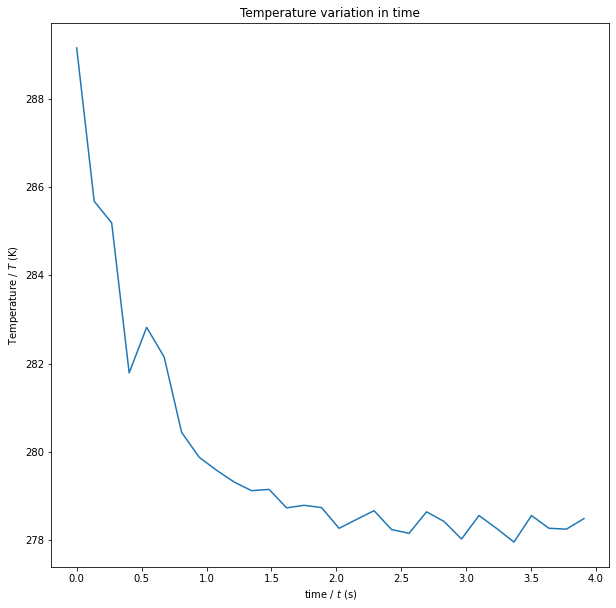

In [132]:
import numpy as np 
import matplotlib.pyplot as plt 

array2d = np.loadtxt("Workshop_Week18_data.csv", delimiter=',') 
time = array2d[:,0]
temperature = array2d[:,1]
# we slice from the index 1 colum, to nothing more
# [:,1:] implies slice until the end

plt.figure(figsize=(10,10))
plt.plot(time, temperature) 
plt.xlabel('time / $t$ (s)') 
plt.ylabel('Temperature / $T$ (K)') 
plt.title('Temperature variation in time') 
plt.show() 

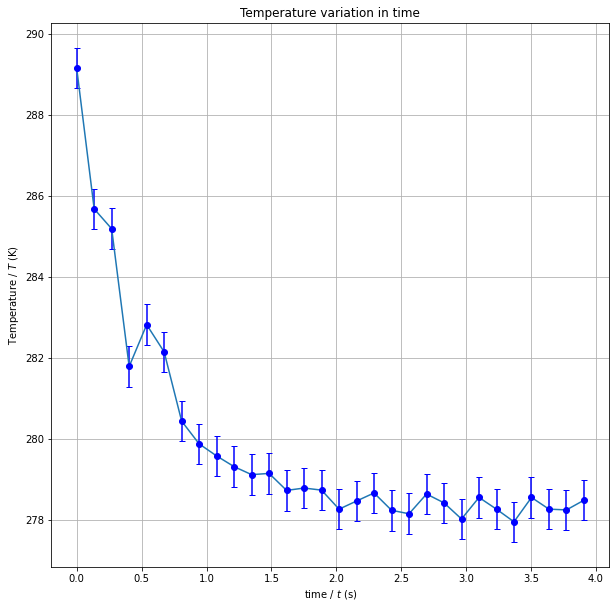

In [133]:
import numpy as np  
import matplotlib.pyplot as plt  

  

array2d = np.loadtxt("Workshop_Week18_data.csv", delimiter=',')  
time = array2d[:,0] 
temperature = array2d[:,1] 

# we slice from the index 1 colum, to nothing more 

# [:,1:] implies slice until the end 


plt.figure(figsize=(10,10)) 
plt.errorbar(time, temperature, yerr=0.5, fmt='ob', capsize=3)  
plt.plot(time, temperature) 
plt.xlabel('time / $t$ (s)')  
plt.ylabel('Temperature / $T$ (K)')  
plt.title('Temperature variation in time')  
plt.grid() 
plt.show()  

### Create a function to model the data

Create a python function to calculate $T(t)$, as defined by the equation at the start of this notebook. Your function should have the following four inputs:
* A list or array of times (**this must be the first input**),
* the value of the time constant $\tau$,
* the value of the final temperature $T_0$,
* the value of the initial temperature different $\Delta T$.

You function must return a list or array of temperatures corresponding to the temperatures at each of the given times.

1. Check that your function is working by making a new graph of $T(t)$. You can use any positive values for $\tau$, $T_0$ and $\Delta T$ in this plot.

2. Create a plot that shows both the data and a calculation of $T(t)$. Change the values $\tau$, $T_0$ and $\Delta T$ to achieve a good fit to the data, by eye. 

3. You should find that the "goodness" of your fit is insensitive to small changes in $\tau$, $T_0$ and $\Delta T$. Use this fact to estimate an uncertainty in your values for $\tau$, $T_0$ and $\Delta T$.

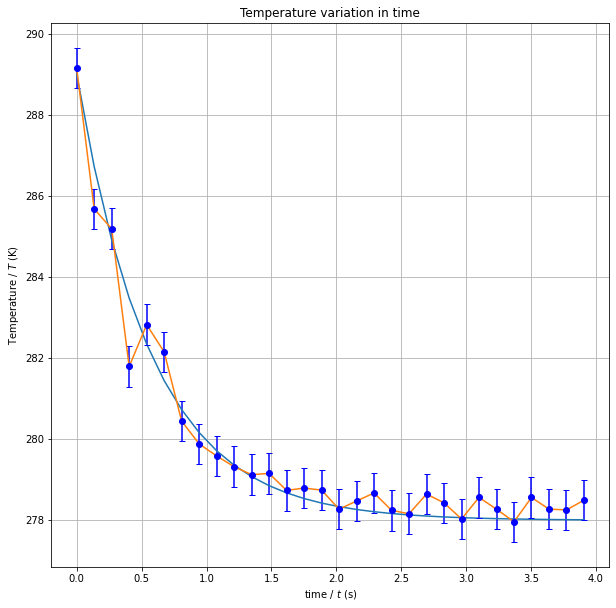

In [134]:
import numpy as np  
import matplotlib.pyplot as plt  

def TempFunc(t, tau, T_0, t_diff):  
    constant = t/tau
    T = t_diff * np.exp( -1*constant) + T_0
    return T

array2d = np.loadtxt("Workshop_Week18_data.csv", delimiter=',')  
time = array2d[:,0] 
temperature = array2d[:,1] 

temperature_c = TempFunc(time,0.58,278,11)

plt.figure(figsize=(10,10))
plt.plot(time, temperature_c) 
plt.errorbar(time, temperature, yerr=0.5, fmt='ob', capsize=3)  
plt.plot(time, temperature) 
plt.xlabel('time / $t$ (s)')  
plt.ylabel('Temperature / $T$ (K)')  
plt.title('Temperature variation in time')  
plt.grid() 
plt.show() 

### Fit the model to the data using `curve_fit`

1. Use the function `curve_fit` from the module `scipy.optimize` to fit your function to the data. You can use the values for $\tau$, $T_0$ and $\Delta$ that you found in the previous section as an initial guess for the fitting parameters.

2. Record the values of $\tau$, $T_0$ and $\Delta$ that `curve_fit` finds to give the best agreement with the data. Do they agree with your previous estimates, within your estimated uncertainty?

3. From the *covariance matrix* returned by `curve_fit`, determine the uncertainty on the fitted values of $\tau$, $T_0$ and $\Delta$. *Hint: code for doing this can be found in the background notebook for this week.*

[0.         0.13472529 0.26945057 0.40417586 0.53890115 0.67362643
 0.80835172 0.94307701 1.07780229 1.21252758 1.34725287 1.48197816
 1.61670344 1.75142873 1.88615402 2.0208793  2.15560459 2.29032988
 2.42505516 2.55978045 2.69450574 2.82923102 2.96395631 3.0986816
 3.23340688 3.36813217 3.50285746 3.63758274 3.77230803 3.90703332]
[289.14602085 285.67660137 285.18731438 281.79249452 282.82310499
 282.15176213 280.44579962 279.88500409 279.5876135  279.32301977
 279.12635158 279.15630483 278.73780481 278.79589698 278.74445589
 278.27504025 278.47631838 278.67448776 278.24761855 278.16173074
 278.64809298 278.43061097 278.03301898 278.56403583 278.27457515
 277.96351666 278.56366399 278.27569392 278.25678915 278.4958305 ]


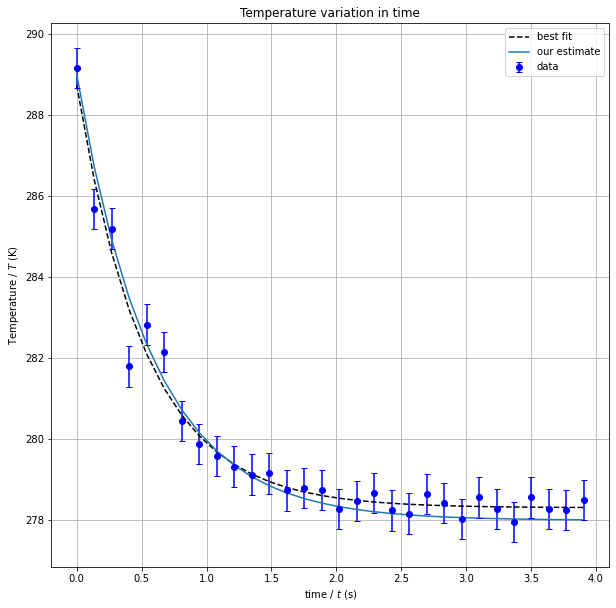

[  0.53301249 278.31019828  10.41655234]
Best fit:
  tau = 0.533012494465743 +/- 0.03543033274396044
  T_0 = 278.3101982823362 +/- 0.1157934761319621
  t_diff = 10.416552335299501 +/- 0.1157934761319621


In [135]:
import scipy.optimize as opt 
import numpy as np  
import matplotlib.pyplot as plt  

def TempFunc(t, tau, T_0, t_diff):  
    constant = t/tau
    T = t_diff * np.exp( -1*constant) + T_0
    return T

array2d = np.loadtxt("Workshop_Week18_data.csv", delimiter=',')  
time = array2d[:,0] 
temperature = array2d[:,1] 
print(time)
print(temperature)

p_init = [0.85, 278, 11] 
p_opt, p_cov = opt.curve_fit(TempFunc, time, temperature, p_init) 
y_fit = TempFunc(time, p_opt[0], p_opt[1], p_opt[2]) 

temperature_c = TempFunc(time,0.58,278,11)

plt.figure(figsize=(10,10)) 
plt.plot(time, y_fit, '--k', label='best fit') 
plt.plot(time, temperature_c, label='our estimate') 
plt.errorbar(time, temperature, yerr=0.5, fmt='ob',label='data', capsize=3)  
plt.xlabel('time / $t$ (s)')   
plt.ylabel('Temperature / $T$ (K)')   
plt.title('Temperature variation in time')   
plt.legend() 
plt.grid()  
plt.show()  

print(p_opt)
uncertainties = np.sqrt(np.diag(p_cov)) 


print('Best fit:') 
print('  tau = ' + str(p_opt[0]) + ' +/- ' + str(uncertainties[0])) 
print('  T_0 = ' + str(p_opt[1]) + ' +/- ' + str(uncertainties[1])) 
print('  t_diff = ' + str(p_opt[2]) + ' +/- ' + str(uncertainties[1])) 

[1.30758775 1.04833285 0.84976217 0.69767126 0.58118052 0.49195696
 0.42361811 0.37127545 0.33118472 0.30047809 0.27695902 0.25894509
 0.24514772 0.23457992 0.22648574 0.22028618 0.21553776 0.21190081
 0.20911517 0.20698156 0.20534738 0.20409571 0.20313702 0.20240273
 0.20184032 0.20140955 0.20107962 0.20082691 0.20063335 0.2004851 ]


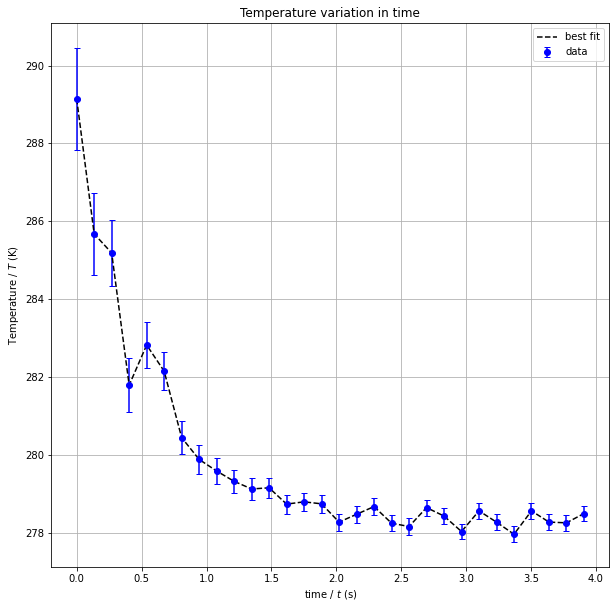

[289.14602085 285.67660137 285.18731438 281.79249452 282.82310499
 282.15176213 280.44579962 279.88500409 279.5876135  279.32301977
 279.12635158 279.15630483 278.73780481 278.79589698 278.74445589
 278.27504025 278.47631838 278.67448776 278.24761855 278.16173074
 278.64809298 278.43061097 278.03301898 278.56403583 278.27457515
 277.96351666 278.56366399 278.27569392 278.25678915 278.4958305 ]


In [136]:

import scipy.optimize as opt 
import numpy as np  
import matplotlib.pyplot as plt  

def TempFunc(t, tau, T_0, t_diff):  
    constant = t/tau
    T = t_diff * np.exp( -1*constant) + T_0
    return T

array2d = np.loadtxt("Workshop_Week18_data.csv", delimiter=',')  
time = array2d[:,0] 
temperature = array2d[:,1] 
errors= array2d[:,2]
print(errors)
 
plt.figure(figsize=(10,10))  
plt.errorbar(time, temperature, yerr=errors, fmt='ob', label='data', capsize=3) 
plt.plot(time, temperature, '--k', label='best fit')  
plt.xlabel('time / $t$ (s)')    
plt.ylabel('Temperature / $T$ (K)')    
plt.title('Temperature variation in time')    
plt.legend()  
plt.grid()   
plt.show()   
print(temperature)

### Fit the model using different measurement uncertainties

So far, we have assumed that the uncertainty in temperature is the same for every data point. We will now consider how to analyse the data if this is not the case. As an example, we will assume that the uncertainty of our temperature measurement increases with temperature. The third column of the data in `Workshop_Week18_data.csv` contains the specific uncertainties for each temperature measurement.

1. Use slice indexing to extract the list of temperature uncertainties (the third column) from the original data array. Assign the list of uncertainties to a new variable.
2. Create a new graph of the data, showing the uncertainties from the data file as error bars on the plot. *Hint: send the array of uncertainties to the `yerr` input of `plt.errorbar`.*

The function `curve_fit` normally assumes that all data points are equally important when performing a fit. However, it can also handle situations where this is not true. In this case, the points with lower uncertainty are given greater importance and vice versa.

To use this feature of `curve_fit`, the input `sigma` needs to be provided with a list of the uncertainties for every data point. It is also important to send the input `absolute_sigma = True`. (This is needed to make sure the uncertainties of the final fitted parameters are correct.) As an example, if the x and y values of some data were stored in the arrays `x_data` and `y_data`, and the uncertainties on the y values were stored in an array `y_uncertainties`, then the code below would perform a fit taking these uncertainties into account:

``p_opt, p_cov = opt.curve_fit(fitting_function, x_data, y_data, p_init, sigma=y_uncertainties, absolute_sigma=True)``

3. Use this feature of `curve_fit`, and the temperature uncertainties in `Workshop_Week18_data.csv` to re-fit your model function to the data. 
4. From the covariance matrix returned by `curve_fit`, determine the uncertainty on the fitted values of $\tau$, $T_0$ and $\Delta$.
5. Compare the fitted values of $\tau$, $T_0$ and $\Delta$ to your previous results. Which fitted parameters have a greater or smaller uncertainty than before? Can you explain, qualitatively, why the uncertainty on each parameter has changed in the way it has?

### Conclusions

Summarise what you found during the exercise and how you answered the questions. Include any numerical results that you found. Include a critical reflection on the quality and clarity of your graphs and suggestions for how they could be improved.